# Data Mining Versuch Recommender Systeme

* Autor: Prof. Dr. Johannes Maucher
* Datum: 30.09.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)


# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __Ähnlichkeit:__ Verfahren zur Bestimmung der Ähnlichkeit zwischen Personen (Kunden) und Elementen (Produkten)
* __Empfehlungssysteme__ Collaborative Filtering 
* __Collaborative Filtering:__ Nutzerbezogener Ansatz und elementbasierter Ansatz

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung
### Recommender Systeme
Recommender Systeme werden im E-Commerce eingesetzt um Werbung in Form von kundenspezifischen Empfehlungen zu verteilen. Weitläufig bekannt sind die Amazon-Empfehlungen, die entweder per e-mail geschickt oder nach dem Log-In in der Web-Page angezeigt werden. Diese Empfehlungen werden in Abhängigkeit von den bisher vom jeweiligen Kunden gekauften bzw. bewerteten Produkten erstellt. In diesem Versuch werden die derzeit wohl am weitest verbreiteteten Verfahren für die Erzeugung kundenspezifischer Empfehlungen vorgestellt, darunter das elementweise Collaborative Filtering, welches z.B. auch von Amazon eingesetzt wird.     

Direkt-Marketing Methoden wie die kundenspezifische Erzeugung und Bereitstellung von Werbung erfordern detaillierte Kunden- und Warenkorbanalysen. Kunden mit ähnlichem Kaufverhalten werden in Kundengruppen zusammengefasst. Die Warenkorbanalyse untersucht u.a. welche Waren bevorzugt im Verbund von der gleichen Person gekauft werden. Damit kann ein Händler Werbung in Form von Empfehlungen individuell und gezielt an seine Kunden richten, abhängig davon welcher Kundengruppe er angehört und welche Produkte bevorzugt von dieser Kundengruppe nachgefragt werden. 

Im ersten Teil der Übung werden fiktive Daten in einer überschaubaren Menge verwendet. Es handelt sich hier um Filmbewertungen. Anhand dieses Beispiels sollen die notwendigen Methoden und Abläufe implementiert und getestet werden. Diese werden im zweiten Teil der Übung auf echte Daten angewandt. Hierzu werden über eine Python-API Daten vom Internet-Meta-Radio _last.fm_ integriert. Auf der Basis dieser Daten sollen dann Musikempfehlungen für last.fm User berechnet werden. 

Recommender Systeme lassen sich mit

* Clustering Verfahren
* Suchalgorithmen
* Collaborativen Filtering 
 
realisieren. Am häufigsten wird hierbei das Collaborative Filtering eingesetzt. Für das Collaborative Filtering wird jeder der $M$ User durch einen $N$-dimensionalen Vektor beschrieben, wobei $N$ die Anzahl der Produkte im Angebot des Händlers ist. Jedes Element im Vektor gehört zu einem speziellen Produkt. Das Element hat den Wert 1, wenn der User dieses Produkt bereits gekauft hat, sonst 0 (andere Wertbelegungen sind möglich, z.B. wenn Produktbewertungen vorliegen). Alle $M$ Zeilenvektoren können zur _User/Item_ Matrix zusammengefasst werden (siehe Abbildung).

![Abbildung User Item Matrix](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/UserItemMatrix.png "User Item Matrix")

Das traditionelle **userbasierte Collaborative Filtering (UCF)**, benutzt die Ähnlichkeit zwischen Benutzern: Um für User $U_i$ eine Empfehlung zu erzeugen wird zunächst der diesem User ähnlichste Kunde (oder eine Menge vom ähnlichsten Kunden) ermittelt. Dann werden $U_i$ die Produkte (Items) empfohlen, welche der ähnlichste Kunde gekauft hat, $U_i$ selbst jedoch noch nicht. 

Dieser Ansatz skaliert schlecht im Fall sehr großer _User/Item_-Matrizen. Ausserdem ist er für User, welche erst wenige Produkte gekauft haben unzuverlässig. Besser eignet sich in diesen Fällen das **itembasierte Collaborative Filtering (ICF)**. Es wird u.a. von Amazon.com eingesetzt. Diese Variante benutzt die Ähnlichkeit zwischen Produkten (Items). Dabei sind Produkte umso ähnlicher je mehr Kunden diese Produkte gemeinsam gekauft haben. Für die Produkte welche ein Referenzuser $U_i$ bereits gekauft hat, werden die ähnlichsten Produkte ermittelt. Diese ähnlichsten Produkte werden $U_i$ empfohlen, wenn er sie nicht schon selbst gekauft hat.

Im folgenden Abschnitt werden einige gebräuchliche Metriken für die Berechnung der Ähnlichkeit zwischen Benutzern oder Artikeln vorgestellt. Für Collaboratives Filtering wird sehr häufig das Cosinus - Ähnlichkeitsmaß eingesetzt.


### Gebräuchliche Ähnlichkeitsmaße

Die __euklidische Distanz__ $d_E(\underline{a},\underline{b})$ zwischen zwei n-dimensionalen Vektoren $\underline{a}=(a_1,\ldots,a_n)$ und $\underline{b}=(b_1,\ldots,b_n)$ berechnet sich zu
	$$
	d_E(\underline{a},\underline{b})=\sqrt{\sum_{i=1}^n (a_i-b_i)^2}
	$$
Zwei Vektoren können als umso ähnlicher erachtet werden, je kleiner deren euklidische Distanz ist. 
Ein auf der euklidischen Metrik basierendes Ähnlichkeitsmaß zwischen zwei Vektoren $\underline{a}$ und $\underline{b}$ kann durch 
$$
s_E(\underline{a},\underline{b})=\frac{1}{1+d_E(\underline{a},\underline{b})}
$$
angegeben werden.


__Pearson Korrelation__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Pearson-Korrelationskoeffizient $\rho_{\underline{a},\underline{b}}$ ausgedrückt werden. Er berechnet sich zu
$$
\rho_{\underline{a},\underline{b}}= \frac{1}{N}\cdot \sum\limits_{i=1}^{N}\frac{(a_i-\overline{a})}{\sigma_a} \frac{(b_i-\overline{b})}{\sigma_b}
$$
Dabei bezeichnet $N$ die Länge der Vektoren, $\overline{a}$ den Mittelwert und $\sigma_a$ die Standardabweichung des Vektors $\underline{a}$. 

Der Pearson-Korrelationskoeffizient misst die lineare Abhängigkeit zwischen zwei Vektoren. Der maximale Wert von $+1$ wird erreicht, wenn die durch die beiden Vektoren definierten N Punkte im 2-dimensionalen Raum auf einer ansteigenden Geraden liegen. Der Minimalwert von $-1$ wird erreicht, wenn die Punkte auf einer abfallenden Geraden liegen. Der Betrag des Koeffizienten ist umso kleiner, je stärker die Punkte von einer fiktiven Geraden (kann durch lineare Regression berechnet werden) abweichen. Der Koeffizient ist $0$ wenn keine lineare Abhängigkeit zwischen den Vektoren besteht.


__Cosinus Ähnlichkeitsmaß__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Cosinus $\cos(\underline{a},\underline{b})$ ausgedrückt werden. Er berechnet sich zu
$$
\cos(\underline{a},\underline{b})= \frac{\underline{a} \cdot \underline{b}}{\left\|\underline{a}\right\|\cdot \left\|\underline{b}\right\|}
$$
wobei im Zähler das Skalarprodukt der beiden Vektoren steht und mit $\left\|\underline{x}\right\|$ der Betrag des Vektors $\underline{x}$ bezeichnet wird.

Falls die Vektoren $\underline{a}$ und $\underline{b}$ mittelwertfrei sind, ist der Cosinus-Ähnlichkeitswert gleich dem Pearson-Korrelationswert. In der Dokument- und Textanalyse wird vornehmlich das Cosinus-Ähnlichkeitsmaß verwendet. 


__Russel Rao Ähnlichkeitsmaß__
Die Russel Rao-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert 1 haben und der Länge $n$ der Vektoren. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Russel-Rao-Ähnlichkeit $s_{RR}(\underline{a},\underline{b})=2/6=0.333$.

__Jaccard Ähnlichkeitsmaß__
Die Jaccard-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert $1$ haben und der Anzahl der Stellen in denen mindestens einer der beiden Vektoren ungleich $0$ ist. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Jaccard-Ähnlichkeit $s_{J}(\underline{a},\underline{b})=2/5=0.4$. Die Jaccard Metrik wird in diesem Versuch für die Bestimmung der Ähnlichkeit von _last.fm_-Usern eingesetzt.


## Vor dem Versuch zu klärende Fragen
Eine Untermenge der im Folgenden aufgeführten Fragen wird zu Beginn des Versuchs im Rahmen eines Gruppenkolloqs abgefragt. Auf jede Frage sollte von mindestens einem Gruppenmitglied eine Antwort geliefert werden und jedes Gruppenmitglied muss mindestens eine der gestellten Fragen beantworten können.

**Aufgaben:**

* Beschreiben Sie das Prinzip des userbasierten Collaborativen Filtering (UCF).

Das Prinzip des _userbasierten Collaborativen Filtering (UCF)_ betrachtet die Ähnlichkeit zwischen zwei Nutzern/Kunden mittels verschiedener Ähnlichkeitsmaßen zum Beispiel der euklidische Distanz oder Pearson Korrelation. Dies bedeutet, um einem Kunden $U_i$ eine Produktempfehlung zu machen wird zuerst eine Menge, diesem Kunden $U_i$ ähnlichen, anderen Kunden ermittelt. Auf Basis dieser kann dem Kunden $U_i$ anschließend eine Produktempfehlung gemacht werden für Produkte, die dieser selbst noch nicht gekauft hat, welche jedoch bereits durch den am ähnlichsten Kunden gekauft wurden. 

* Welche Nachteile hat das UCF?

Eine Schwierigkeit des _UCF_ Verfahrens ist, dass dies im Falle sehr großer _User/Item_-Matrizen nur schlecht skaliert. Darüberhinaus ist die Anwendung dieses Prinzips nicht zuverlässig bei Nutzern, welche erst wenige Produkte gekauft haben. 

In der Praxis übertrifft ein Item-Item-Modell in vielen Anwendungsfällen ein Benutzer-Benutzer-Modell, da man sagen kann, dass Produkte (Items) "einfacher" sind als Benutzer. Das bedeutet, dass Produkte (Items) zu einer kleinen Gruppe von Genres gehören, während die Benutzer zum Beispiel sehr unterschiedliche Geschmäcker haben. Außerdem ist die Ähnlichkeit von Items aussagekräftiger als die Ähnlichkeit von Benutzern.

* Worin besteht der Unterschied zwischen UCF und itembasierten Collaborativen Filtering (ICF)?

Das _itembasierte Collaborative Filtering (ICF)_ basiert im Gegensatz zum _UCF_ Prinzip auf der Ähnlichkeit zwischen Produkten (Items). Je mehr Kunden bestimmte Produkte gemeinsam gekauft haben, desto ähnlicher sind diese. Auf dieser Basis werden die ähnlichsten Produkte ermittelt. 

* Gegeben seien die Vektoren 

    \begin{eqnarray*}
    \underline{a} & = & [1,2,3,4,5,6] \\
    \underline{b} & = & [3,3,5,6,7,8] \\
    \end{eqnarray*}
    
    Schreiben Sie eine Python Funktion, die den Mittelwert derartiger Vektoren berechnet. Schreiben Sie eine weitere Funktion, die die Varianz berechnet

#### Mittelwert

In [1]:
a=[1,2,3,4,5,6]
b=[3,3,5,6,7,8]

def mittelwert (vector):
    sum = 0
    for i in vector:
        sum += i
    return sum/len(vector)

print("Mittelwert von Vektor a:", mittelwert(a))
print("Mittelwert von Vektor b:",mittelwert(b))


Mittelwert von Vektor a: 3.5
Mittelwert von Vektor b: 5.333333333333333


#### Varianz

In [2]:
def varianz(vector):
    sum = 0
    mittel = mittelwert(vector)
    for i in vector:
        sum += (i-mittel)**2
        
    return sum/len(vector)
    
print("Varianz von Vektor a:", varianz(a))
print("Varianz von Vektor b:", varianz(b))


Varianz von Vektor a: 2.9166666666666665
Varianz von Vektor b: 3.5555555555555554


* Wie groß ist die

    - Euklidische Ähnlichkeit
    - Pearson Ähnlichkeit
    - Cosinus Ähnlichkeit
    
    zwischen den Vektoren $\underline{a}$ und $\underline{b}$? 

In [3]:
import math
import scipy
from scipy import spatial, stats # sonst evtl OS Probleme

**- Euklidische Ähnlichkeit**

Zwei Vektoren können als umso ähnlicher erachtet werden, je kleiner deren euklidische Distanz ist.

In [4]:
print("Euklid:", scipy.spatial.distance.euclidean(a,b))

Euklid: 4.58257569495584


**- Pearson Ähnlichkeit**

Der Pearson-Korrelationskoeffizient misst die lineare Abhängigkeit zwischen zwei Vektoren. Der maximale Wert ist +1 und der Minimalwert -1. Der Betrag des Koeffizienten ist umso kleiner, je stärker die Punkte von einer fiktiven Geraden (kann durch lineare Regression berechnet werden) abweichen. Der Koeffizient ist  0  wenn keine lineare Abhängigkeit zwischen den Vektoren besteht.



In [5]:
print("Pearson:", scipy.stats.pearsonr(a,b))

Pearson: (0.9833434220628547, 0.0004138517691427288)


**- Cosinus Ähnlichkeit**

Kosinus-Ähnlichkeit ist ein Maß für die Ähnlichkeit zweier Vektoren. Die Kosinus-Ähnlichkeit liegt zwischen −1 (genau entgegengerichtet) und 1 (genau gleichgerichtet). Ein Wert von 0 bedeutet üblicherweise Unabhängigkeit (Orthogonalität). Zwischenwerte zeigen Ähnlichkeit oder Unähnlichkeit an.
In der Dokument- und Textanalyse wird vornehmlich das Cosinus-Ähnlichkeitsmaß verwendet.


Die Berechnung der Kosinusdistanz mit normalisierten Werten ( _zentrierte Kosinusähnlichkeit_ ) erfasst die Intuition besser, da fehlende Bewertungen als "Durchschnitt" behandelt werden und sie kann sowohl mit "harten Bewertern" als auch mit "leichten Bewertern" einfach umgehen. Auf diese Weise zeigt ein Wert nahe Null eine höhere Ähnlichkeit.
Dieses Ähnlichkeitsmaß ist auch bekannt als **Pearson-Korrelation** ( _zentrierte Cosinus-Ähnlichkeit_ ). 

In [6]:
print("Cosinus:", (1-scipy.spatial.distance.cosine(a,b)))

Cosinus: 0.9910600847451639


* In welchen Fällen sind Cosinus- und Pearsonähnlichkeit der euklidischen Ähnlichkeit vorzuziehen?

Die euklidische Ähnlichkeit nutzt absolute Werte zur Berechnung der Ähnlichkeit. Das heißt, wenn Werte skaliert werden ändert sich auch die euklidische Ähnlichkeit.

Bei Cosinus- und Pearsonähnlichkeit ändern sich die Werte beim skalieren nicht. Man nutzt diese Ähnlichkeiten wenn man Korrelationen unabhängig von der absoluten Distanz von Werten bestimmen will.

Die Kosinusähnlichkeit betrachtet den Winkel zwischen zwei Vektoren, während die euklidische Ähnlichkeit den Abstand zwischen zwei Punkten misst. Falls die Vektoren _a_, _b_ keinen Mittelwert haben, d.h. mittelwertfrei sind, so ist der Kosinus-Ähnlichkeitswert gleich dem Pearson-Korrelationswert. Die Kosinusähnlichkeit wird im Allgemeinen als Metrik zur Entfernungsmessung verwendet, wenn die Größe der Vektoren keine Rolle spielt. 
Dies geschieht z.B. bei der Arbeit mit Textdaten, die durch Wortzahlen dargestellt werden. 



In [7]:
from IPython.display import Latex
from IPython.display import Image

# Versuchsdurchführung
## Teil 1: Fiktive Filmbewertung
### Daten
Folgende Tabelle enthält die Filmbewertungen von 7 Personen.
from IPython.display import Latex
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

![Abbildung Bewertung Fiktive Kunden](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining/Bilder/recommenderFilmRecommendations.PNG)

Die Tabelle ist als Python dictionary _critics_ implementiert. Die Keys des Python-Dictionary definieren die Namen von Personen (Zeilen in der Matrix), die Filme bewertet haben. Die Values sind selbst wieder Dictionarys, welche als Keys die Filmnamen (Spalten in der Matrix) und als Values die jeweilige Filmbewertung (Matrixelment) enthalten.

In [8]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}
}

### Ähnlichkeiten berechnen

Für die Bestimmung der Ähnlichkeit zwischen Personen und Produkten werden in diesem Versuch ein auf der euklidischen Distanz basierendes Ähnlichkeitsmaß und die Pearson-Korrelation verwendet. Beide Ähnlichkeitsmaße sind in den unten definierten Funktionen implementiert. Alle drei hier implementierten Funktionen zur Berechnung der Ähnlichkeit erhalten als Übergabeparameter das oben definierte Dictionary, das die Filmbewertungen enthält und die Namen der zwei Personen, die verglichen werden sollen. 

Zu beachten ist, dass in beiden Funktionen für die Berechnung der Ähnlichkeit zwischen zwei Personen nur die Produkte berücksichtigt werden, welche von beiden Personen schon bewertet wurden. Es handelt sich hier also um modifizierte Ähnlichkeitsfunktionen. 

__Aufgabe:__
Fragen Sie von diesem Dictionary _Toby's_ Bewertung des Films _Snakes on a Plane_ ab und geben Sie diesen Wert aus: 

In [9]:
print('Bewertung von Toby für Snakes on a Plane: ', critics.get("Toby").get("Snakes on a Plane"))

Bewertung von Toby für Snakes on a Plane:  4.5


In [10]:
import numpy as np
import scipy.spatial.distance as sci

In [11]:
def sim_euclid(prefs,person1,person2,normed=True):
    ''' Returns a euclidean-distance-based similarity score for 
    person1 and person2. In the distance calculation the sum is computed 
    only over those items, which are nonzero for both instances, i.e. only
    films which are ranked by both persons are regarded.
    If the parameter normed is True, then the euclidean distance is divided by
    the number of non-zero elements integrated in the distance calculation. Thus
    the effect of larger distances in the case of an increasing number of commonly ranked
    items is avoided.
    '''
    # Get the list of shared_items
    si={}
    for item in prefs[person1]: 
        if item in prefs[person2]: si[item]=1
    # len(si) counts the number of common ratings
    # if they have no ratings in common, return 0
    if len(si)==0: return 0

    # Add up the squares of all the differences
    sum_of_squares=np.sqrt(sum([pow(prefs[person1][item]-prefs[person2][item],2) 
                     for item in prefs[person1] if item in prefs[person2]]))
    if normed:
        sum_of_squares= 1.0/len(si)*sum_of_squares
    return 1/(1+sum_of_squares)


def sim_pearson(prefs,p1,p2):
    '''
    Returns the Pearson correlation coefficient for p1 and p2
    '''
    
    # Get the list of commonly rated items
    si={}
    for item in prefs[p1]: 
        if item in prefs[p2]: si[item]=1

    # if they are no ratings in common, return 0
    if len(si)==0: return 0

    # Sum calculations
    n=len(si)
  
    # Calculate means of person 1 and 2
    mp1=np.mean([prefs[p1][it] for it in si])
    mp2=np.mean([prefs[p2][it] for it in si])
  
    # Calculate standard deviation of person 1 and 2
    sp1=np.std([prefs[p1][it] for it in si])
    sp2=np.std([prefs[p2][it] for it in si])
  
    # If all elements in one sample are identical, the standard deviation is 0. 
    # In this case there is no linear correlation between the samples
    if sp1==0 or sp2==0:
        return 0
    r=1/(n*sp1*sp2)*sum([(prefs[p1][it]-mp1)*(prefs[p2][it]-mp2) for it in si])
    return r


def sim_RusselRao(prefs,person1,person2,normed=True):
    ''' Returns RusselRao similaritiy between 2 users. The RusselRao similarity just counts the number
    of common non-zero components of the two vectors and divides this number by N, where N is the length
    of the vectors. If normed=False, the division by N is omitted.
    '''
    # Get the list of shared_items
    si={}
    commons=0
    for item in prefs[person1]: 
        if prefs[person1][item]==1 and prefs[person2][item]==1:   
            commons+=1
    #print commons
    if not normed:
        return commons
    else:
        return commons*1.0/len(prefs[person1]) 

**Aufgabe:**
1. Geben Sie die euklidische Ähnlichkeit und die Pearson Ähnlichkeit zwischen den Personen _Toby_ und _Lisa Rose_ aus.

In [12]:
print('Euklidische Ähnlichkeit: ', sim_euclid(critics,'Lisa Rose','Toby'))

Euklidische Ähnlichkeit:  0.615911621788925


In [13]:
print('Pearson Ähnlichkeit: ', sim_pearson(critics,'Lisa Rose','Toby'))

Pearson Ähnlichkeit:  0.9912407071619302


2. Diskutieren Sie die unterschiedlichen Ähnlichkeitswert.

Die Ähnlichkeitswerte liefern für die User Lisa Rose und Toby ein sehr unterschiedliches Ergebnis. Lisa Rose hat insgesamt 6 Filme bewertet, während Toby nur 3 bewertet hat. Im Falle der euklidischen Ähnlichkeit sind nur die  absoluten Werte in die Berechnung eingeflossen, bei denen von beiden Personen Bewertungen vorliegen. Es ergibt sich daher ein Wert von 0.61.
Die Pearson Ähnlichkeit mit 0.99 ist hier sehr hoch, da beide Personen die Filme ähnlich bewertet haben. Zum Beispiel ist der Film "You, me and dupree" im Vergleich zu den anderen Filmen von beiden am schlechtesten bewertet worden.

__Aufgabe:__
1. Schreiben Sie eine Funktion _topMatches(prefs,person,similarity)_, welche für eine beliebige in _critics_ enthaltene Person die Ähnlichkeitswerte zu allen anderen Personen berechnet und in einer geordneten Liste zurück gibt. Der Funktion soll als Übergabeparameter auch die anzuwendende Ähnlichkeitsfunktion (*sim_euclid* oder *sim_pearson*) übergeben werden können. Berechnen Sie mit dieser Funktion für jede Person die *top matches*, zunächst unter Verwendung der euklidischen- dann unter Verwendung der Pearson-Ähnlichkeit.

In [14]:
def topMatches(prefs,person,similarity):
    matches = []
    for p in prefs:
        if p != person:
            matches.append((p, similarity(prefs, person, p)))
            
    matches.sort(key=lambda tup: tup[1], reverse=True)
    return matches

In [15]:
# Top matches of all persons

top_matches_euclid = []
top_matches_pearson = []


for name in critics:
    top_matches_euclid.append([name,topMatches(critics, name, sim_euclid)])
    top_matches_pearson.append([name,topMatches(critics, name, sim_pearson)])

print('Euclid top matches of all persons: \n', top_matches_euclid, '\n')
print('Pearson top matches of all persons: \n', top_matches_pearson)

Euclid top matches of all persons: 
 [['Lisa Rose', [('Mick LaSalle', 0.8092564301694538), ('Michael Phillips', 0.7815501047457912), ('Claudia Puig', 0.7597469266479578), ('Jack Matthews', 0.7208254886814803), ('Gene Seymour', 0.714462989423532), ('Toby', 0.615911621788925)]], ['Gene Seymour', [('Jack Matthews', 0.9090909090909091), ('Lisa Rose', 0.714462989423532), ('Mick LaSalle', 0.6978305207480379), ('Michael Phillips', 0.6737986373538911), ('Claudia Puig', 0.6622946603252993), ('Toby', 0.5108747069239427)]], ['Michael Phillips', [('Lisa Rose', 0.7815501047457912), ('Claudia Puig', 0.7759907622602041), ('Mick LaSalle', 0.7166996059009808), ('Gene Seymour', 0.6737986373538911), ('Jack Matthews', 0.6534537935444722), ('Toby', 0.5584815598877471)]], ['Claudia Puig', [('Michael Phillips', 0.7759907622602041), ('Lisa Rose', 0.7597469266479578), ('Mick LaSalle', 0.6964322291925094), ('Gene Seymour', 0.6622946603252993), ('Jack Matthews', 0.6534537935444722), ('Toby', 0.6246387977050463)]

2. Geben Sie mit der implementierten Funktion die *top matches* der Person Toby aus.

In [16]:
print('Euclid top Matches Toby: ',topMatches(critics, 'Toby', sim_euclid))

Euclid top Matches Toby:  [('Mick LaSalle', 0.6666666666666666), ('Claudia Puig', 0.6246387977050463), ('Lisa Rose', 0.615911621788925), ('Michael Phillips', 0.5584815598877471), ('Jack Matthews', 0.5227744249483389), ('Gene Seymour', 0.5108747069239427)]


In [17]:
print('Pearson top Matches Toby: ',topMatches(critics, 'Toby', sim_pearson))

Pearson top Matches Toby:  [('Lisa Rose', 0.9912407071619302), ('Mick LaSalle', 0.9244734516419051), ('Claudia Puig', 0.8934051474415642), ('Jack Matthews', 0.6628489803598703), ('Gene Seymour', 0.3812464258315117), ('Michael Phillips', -1.0)]


3. Vergleichen Sie die beiden Ähnlichkeitsmaße. Welches Ähnlichkeitsmaß erscheint Ihnen für diesen Anwendungsfall sinnvoller und warum?

Im Fall von Toby ist die pearson Ähnlichkeit die bessere Wahl. Kriterium ist hierbei ob beide Personen die gleichen Filme bereits bewertet haben und wie ähnlich sich die angegebenen Bewertungen sind. Dabei ist Toby am ähnlichsten mit der Person Lisa Rose. Beide haben die selben Filme bewertet und sehr ähnliche Bewertungen abgegeben. Am unähnlichsten ist Toby mit der Person Michael Philipps, was Sinn ergibt, da sie nur für zwei gleiche Filme eine Bewertung abgegeben haben.

Für den Anwendungsfall der Filmempfehlung ist die Pearson Ähnlichkeit sinnvoller, da es Korrelationen aufzeigt, unabhängig von den absoluten Bewertungen. Jeder Mensch bewertet unterschiedlich, manche vergeben z.B. viel häufiger die maximale Punktzahl als andere, die hat bei der Pearson Ähnlichkeit keinen Einfluss.

### Berechnung von Empfehlungen mit User basiertem Collaborative Filtering
Für die Produkte, die von einer Person noch nicht gekauft wurden, sollen Empfehlungen berechnet werden. Die Empfehlungen können ebenfalls Werte zwischen 1 (wird nicht empfohlen) und 5 (wird stark empfohlen) annehmen. Für die Berechnung der Empfehlung werden die Bewertungen des jeweiligen Produkts durch die anderen Personen herangezogen. Dabei werden die Bewertungen der ähnlichen Personen (d.h. hoher Pearson-Korrelationswert) stärker mit einbezogen als die Bewertungen durch Personen mit einem niedrigen Korrelationswert.

__Beispiel:__
Toby hat die Filme _The Night Listener_, _Lady in the Water_ und _Just My Luck_ noch nicht gekauft. Für diese Filme soll für Toby eine Empfehlung berechnet werden.
In der unten aufgeführten Tabelle enthält die zweite Spalte die _Pearson-Ähnlichkeitswerte_ zwischen Toby und den anderen Personen. Die Spalten 3, 5 und 7 enthalten die Bewertungen der Filme _The Night Listener_, _Lady in the Water_ und _Just My Luck_ durch die anderen Personen. Die Spalten 4, 6 und 8 enthalten die jeweilige Filmbewertung gewichtet (mulipliziert) mit den Ähnlichkeitswerten der jeweiligen Person. Es fällt auf, dass in der Tabelle _Michael_ nicht enthalten ist. Das liegt daran, dass _Michael_ und _Toby_ einen negativen Ähnlichkeitswert aufweisen, d.h. deren Interessen sind gegenläufig. Personen mit negativem Ähnlichkeitswert sollten für Empfehlungen nicht berücksichtigt werden.
Die Zeile _Sum_ enthält die Summe aller gewichteten Bewertungen. Aus diesem Wert allein kann die Empfehlung noch nicht abgeleitet werden, da Filme die nur von wenigen Personen bewertet wurden, eine relativ kleine Summe ergeben. Deshalb sollte _Sum_ noch durch die Anzahl der Bewertungen für diesen Film geteilt werden. Oder besser: Nicht durch die Summe der Bewertungen, sondern durch die Summe der relevanten Ähnlichkeitswerte (_KSum_). Der resultierende Empfehlungswert ist in der letzten Zeile eingetragen.


![Abbildung Calculate Recommendation](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining/Bilder/recommenderFilmCalculation.PNG)


__Aufgabe:__
Schreiben Sie eine Funktion _getRecommendations(prefs,person,similarity)_, mit der die Empfehlungswerte berechnet werden können und bestimmen Sie die Empfehlungswerte für Toby. Der Funktion wird  

* das Dictionary _critics_ mit den Filmbewertungen, 
* der Name der Person, für welche Empfehlungen berechnet werden sollen
* die Methode für die Berechnung der Ähnlichkeit *sim_euclid* oder *sim_pearson*

übergeben. Die Methode soll eine geordnete Liste zurück geben. Jedes Listenelement enthält an erster Stelle den berechneten Empfehlungswert und an zweiter Stelle den Namen des Films. Die Liste soll nach Empfehlungswerten absteigend geordnet sein.

Testen Sie diese Funktion indem Sie die Empfehlungen für _Toby_ berechnen und mit den Werten in der oben aufgeführten Tabelle vergleichen.

In [18]:
def getRecommendations(prefs, person, similarity):
    recommendations = []
    korrelation = topMatches(prefs,person,similarity)
    #Alle Filme in eine Liste schreiben
    filmList = []
    for i in prefs:
        for f in prefs[i]:
            if f not in filmList:
                filmList.append(f)
    #schon bewertete Filme entfernen
    for k,v in prefs[person].items():
        if v>0:
            filmList.remove(k)
    
    for film in filmList:
        sumRating = 0
        sumKorr = 0
        
        for person in korrelation:
            if person[1] >=0:
                #print(person)
                if film in list(prefs[person[0]]):
                    sumRating += person[1]*prefs[person[0]][film]
                    sumKorr += person[1]
        
        recommendations.append((sumRating/sumKorr,film))
    recommendations.sort(reverse=True)
    return recommendations

In [19]:
getRecommendations(critics,"Toby",sim_pearson)

[(3.3477895267131013, 'The Night Listener'),
 (2.8325499182641622, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

Beim Vergleichen der Werte fällt auf, dass die Werte fast übereinstimmen. Wir gehen davon aus, dass die geringe Abweichung auf den gerundeten Werten der Tabelle basieren.

### Berechnung von Empfehlungen mit Item basiertem Collaborative Filtering
In den vorigen Aufgaben wurden Ähnlichkeiten zwischen Personen bestimmt und für Produktempfehlungen benutzt (User basiertes Collaborative Filtering). Jetzt soll die Ähnlichkeit zwischen Produkten berechnet werden und auf der Basis dieser Produktähnlichkeit Empfehlungen berechnet werden (Item basiertes Collaborative Filtering).

Dabei sollen die bereits implementierten Ähnlichkeitsfunktion *sim_euclid* und *sim_pearson* sowie die Ähnlichkeeits-Sortierfunktion *topMatches* unverändert eingesetzt werden.

__Aufgabe:__

1. Implementieren Sie eine Funktion, welche das Bewertungsdictionary *critics* derart transformiert, dass die Funktionen *sim_euclid*, *sim_pearson* und *topMatches* für das Item-basierte CF unverändert eingesetzt werden können. Die transformierte Matrix soll unter dem Namen *transCritics* abgespeichert werden.
2. Schreiben Sie eine Funktion *calculateSimilarItems*, die aus der transformierten Matrix *transCritics* ein Dictionary berechnet, welches die Ähnlichkeit zwischen allen Filmen beschreibt. Die Keys des Dictionary sind die Filmnamen. Die Values sind geordnete Listen, welche die Funktion *topMatches* zurückgibt, wenn sie für die Filme (nicht für die User) aufgerufen wird. Dieses Dictionary wird an das aufrufende Programm zurück geben. 
3. Schreiben Sie eine Funktion *getRecommendedItems*, welche basierend auf dem im unten aufgeführten Beispiel dargestellten Verfahren unter Vorgabe der Bewertungsmatrix und der zu verwendenden Ähnlichkeitsfunktion Produktempfehlungen berechnet.
4. Testen Sie die Funktion indem Sie die Empfehlungen für Toby berechnen und mit den Werten in der unten aufgeführten Tabelle vergleichen

__Erläuterndes Beispiel:__

_Toby_ hat die Filme *The Night Listener*, *Lady in the Water* und *Just My Luck* noch nicht gekauft. Für diese Filme soll für *Toby* eine Empfehlung berechnet werden. Gekauft und bewertet hat *Toby* die Filme *Snakes on a plane*, *Superman Returns* und *You and me and Dupree*. Diese bereits vorhandenen Filme bilden die erste Spalte der unten dargestellten Matrix. In der zweiten Spalte befinden sich _Toby's_ Bewertungen dieser Filme. Die Spalten 3,5 und 7 enthalten die Ähnlichkeitswerte (mit *calculateSimilarItems* unter Verwendung des normierten euklidischen Ähnlichkeitsmaßes berechnet) zwischen den drei von *Toby* noch nicht gekauften Filmen und den drei von _Toby_ bewerteten Filmen. Diese Ähnlichkeitswerte werden jeweils mit _Toby's_ Bewertungen multipliziert. Das Resultat dieser Multiplikation befindet sich in den Spalten 4,6 und 8. Der finale Empfehlungswert für die von _Toby_ noch nicht gekauften Filme wird berechnet in dem in den Spalten 4,6 und 8 zunächst die Summe über die Werte dieser Spalte in den drei oberen Zeilen berechnet wird und durch die Summe über die Werte der Spalten 3,5 und 7 geteilt wird. Im Fall, dass die *Pearson-Korrelation* zwischen den Filmen als Ähnlichkeitswert herangezogen wird, können negative Ähnlichkeitswerte auftreten. Dann soll in die Berechnung eines Empfehlungswert für Film A nur dann die Bewertung von Film B einfließen, wenn der Korrelationswert zwischen beiden $>0$ ist.  

![Abbildung Calculate Itembased Recommendation](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining/Bilder/recommenderFilmItemBased.PNG)

1. Implementieren Sie eine Funktion, welche das Bewertungsdictionary *critics* derart transformiert, dass die Funktionen *sim_euclid*, *sim_pearson* und *topMatches* für das Item-basierte CF unverändert eingesetzt werden können. Die transformierte Matrix soll unter dem Namen *transCritics* abgespeichert werden.

In [20]:
import collections

In [21]:
def transform(dictionary):
    transDict = collections.defaultdict(dict)
    for user, itemDict in dictionary.items():
        for i in itemDict:
            transDict[i][user] = itemDict[i] 
    return dict(transDict)

In [22]:
transCritics = transform(critics)

Da wir jetzt das Item basierte CF einsetzen, wird das ursprüngliche Dictionary _critics_ transformiert, sodass anstelle des Nutzers als Key ein Produkt/Item verwendet wird.

2. Schreiben Sie eine Funktion *calculateSimilarItems*, die aus der transformierten Matrix *transCritics* ein Dictionary berechnet, welches die Ähnlichkeit zwischen allen Filmen beschreibt. Die Keys des Dictionary sind die Filmnamen. Die Values sind geordnete Listen, welche die Funktion *topMatches* zurückgibt, wenn sie für die Filme (nicht für die User) aufgerufen wird. Dieses Dictionary wird an das aufrufende Programm zurück geben. 

In [23]:
def calculateSimilarItems(transCritics, similarity):
    similarDict = {}
    for movie in transCritics:
        similarDict[movie] = topMatches(transCritics, movie, similarity)
    return similarDict    

3. Schreiben Sie eine Funktion *getRecommendedItems*, welche basierend auf dem im unten aufgeführten Beispiel dargestellten Verfahren unter Vorgabe der Bewertungsmatrix und der zu verwendenden Ähnlichkeitsfunktion Produktempfehlungen berechnet.

In [24]:
def getRecommendedItems(prefs, person, similarity):
    recommendations = []
    filmKorrelation = calculateSimilarItems(transCritics, similarity)
    #Alle Filme in eine Liste schreiben
    filmList = []
    for i in prefs:
        for f in prefs[i]:
            if f not in filmList:
                filmList.append(f)
    #schon bewertete Filme entfernen
    filmList = set(filmList) - set(prefs[person])
    
    
    for film in filmList:
        sumKorr = 0
        sumRatingKorr = 0.0
        for ratedFilm in prefs[person]:
            rating = prefs[person][ratedFilm]
            for korrelation in filmKorrelation[ratedFilm]:
                if korrelation[0] == film and korrelation[1] > 0:
                    sumRatingKorr += rating * korrelation[1]
                    sumKorr += korrelation[1]
            
           
        if sumKorr == 0:
            recommendations.append((0, film))
        else:    
            recommendations.append((sumRatingKorr/sumKorr, film))
        
    recommendations.sort(reverse=True)    
    return recommendations         


4. Testen Sie die Funktion indem Sie die Empfehlungen für Toby berechnen und mit den Werten in der unten aufgeführten Tabelle vergleichen

In [25]:
getRecommendedItems(critics, "Toby", sim_euclid)

[(3.20449096016088, 'The Night Listener'),
 (3.082136961799338, 'Lady in the Water'),
 (3.041861869079099, 'Just My Luck')]

Beim Vergleichen der Werte fällt auf, dass die Werte fast übereinstimmen. Wir gehen davon aus, dass die geringe Abweichung auf den gerundeten Werten der Tabelle basieren.

## last.fm Musikempfehlungen
Kopieren Sie die Datei _pylast.py_ vom _Resources_-Ordner im _DataMining_-Ordner des Skripteservers in das Verzeichnis dieses _IPython Notebooks_. In dieser Datei sind alle Zugriffsfunktionen auf _last.fm_ Dienste implementiert. Die notwendigen Anmelde- und Authentifizierungsdaten für den User _pythonlab_ sind ebenfalls schon in diesem Modul eingetragen.

__Aufgabe:__

1. Stellen Sie durch Aufruf der Funktion *network=pylast.get_lastfm_network()* eine Verbindung zu *last.fm* her. Beim Aufruf der Funktion wird die Anmeldung und Authentifizierung durchgeführt. Die Funktion gibt ein Objekt der Klasse *Network* zurück. Über dieses Objekt können Methoden, wie

    * *get_artist("kuenstlerName")* (liefert Objekt der Klasse _Artist_)
    * *get_album("albumName")* (liefert Objekt der Klasse _Album_)
    * *get_track("songName")* (liefert Objekt der Klasse _Track_)
    * *get_user("userName"):* (liefert Objekt der Klass_Tag_)
    * usw.
    
      aufgerufen werden. Die Menge aller verfügbaren Klassen und deren Attribute und Methoden können dem Modul _pylast.py_ entnommen werden.

2. Rufen Sie über das oben instanziierte _Network_-Objekt die Methode *get_artist("BandIhrerWahl")* auf.
3. Rufen Sie über das oben instanziierte _Artist_-Objekt die Methode *topfans=get_top_fans(10)* auf. Die Methode gibt eine Liste von _User_-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Legen Sie deshalb mit _group=[a.item for a in topfan]_ eine Liste an, die nur noch die User Objekte enthält. **Wichtige Anmerkung:** Seit August 2015 gibt es Probleme mit der lastFM API Methode *get_top_fans()* (siehe auch: [pylast issues](https://github.com/pylast/pylast/issues/155s)). Falls am Versuchstermin der Fehler noch nicht behoben ist, können Sie den unten stehenden Code benutzen. Darin wird versucht auf die API-Methode zuzugreifen. Falls das nicht möglich ist, wird eine vordefinierte Liste von Usern angewandt. Diese Liste repräsentiert die *Top Fans* der Band *Slipknot* im Frühjahr 2015. 
4. Implementieren Sie eine Funktion *createLastfmUserDict()*. Dieser Funktion soll, die oben angelegte Liste von _User_-Objekten _group_ übergeben werden. Für jeden User in *group* sollen die 20 beliebtesten Bands mit der Methode *topartists=get_top_artists()[0:20]* bestimmt werden. Die Methode gibt eine Liste von *Artist*-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Auf das *i.te* *Artist*-Objekt selbst kann mit *topartists[i].item* zugegriffen werden. Die Menge aller Bands, die auf diese Weise gesammelt werden, wird im folgenden mit _AllBands_ bezeichnet. D.h. in *AllBands* befinden sich alle Bands, die für mindestens einen User in *group* zu den Top-20 gehören. Nun soll ein verschachteltes Dictionary mit Namen *userDict* wie folgt angelegt werden:

    * Die Keys sind die Namen der _User_-Objekte in _group_. Auf den Namen eines Objekts kann mit *get_name()* zugegriffen werden.
    * Die Values sind selbst wieder Dictionaries, deren Keys die Namen der Bands in *AllBands* sind. Achten Sie auch hier darauf, dass Sie nicht das *Artist*-Objekt selbst, sondern dessen Namen als Key verwenden. 
    * Für den User *a* und die Band *b* ist der Value *userDict[a][b]= 1*, falls *b* zu den Top-20 des Users *a* gehört. Andernfalls ist *userDict[a][b]= 0*. 
    
    Das derart angelegte Dictionary soll von der Funktion zurückgegeben werden. 
5. Wählen Sie jetzt einen beliebigen User aus *group*. Bestimmen Sie zu diesem User die ähnlichsten User in *group* durch Anwendung der im ersten Teilversuch implementierten Funktion *topMatches()*. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik angewandt werden.
6. Bestimmen Sie dann für den gewählten User Band-Empfehlungen durch Anwendung der im ersten Teilversuch implementierten Funktion *getRecommendations()*. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik, danach die Russel_Rao Metrik, angewandt werden.     
7. Diskutieren Sie das Ergebnis

1. Stellen Sie durch Aufruf der Funktion *network=pylast.get_lastfm_network()* eine Verbindung zu *last.fm* her. Beim Aufruf der Funktion wird die Anmeldung und Authentifizierung durchgeführt. Die Funktion gibt ein Objekt der Klasse *Network* zurück. Über dieses Objekt können Methoden, wie

    * *get_artist("kuenstlerName")* (liefert Objekt der Klasse _Artist_)
    * *get_album("albumName")* (liefert Objekt der Klasse _Album_)
    * *get_track("songName")* (liefert Objekt der Klasse _Track_)
    * *get_user("userName"):* (liefert Objekt der Klass_Tag_)
    * usw.
    
      aufgerufen werden. Die Menge aller verfügbaren Klassen und deren Attribute und Methoden können dem Modul _pylast.py_ entnommen werden.

In [26]:
import pylast

In [27]:
# API key and secret key
API_KEY = "a20050eb12e8982389a48771106c098b"
API_SECRET = "bef41ac107fae73ad2ee71b7e6fff10a"
# Authentication order to perform a write operation 
username = "pythonlabhdm"
password_hash = pylast.md5("pythonlabhdm123#")

In [28]:
# Connect to last.fm API
network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET,
                               username=username, password_hash=password_hash)

Über das Pylast Framework wird die Verbindung zur lastFM API hergestellt. Ebenso wird hier auch das Errorhandling durch die pylast library übernommen. Verschiedene angebotene Methoden ermöglichen das Abrufen von Daten der lastFM API endpoints.

2. Rufen Sie über das oben instanziierte _Network_-Objekt die Methode *get_artist("BandIhrerWahl")* auf.

In [29]:
# Keyword to search for
band = "Slipknot"
# Retrieve artist object from network
artist = network.get_artist(band)

3. Rufen Sie über das oben instanziierte _Artist_-Objekt die Methode *topfans=get_top_fans(10)* auf. Die Methode gibt eine Liste von _User_-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Legen Sie deshalb mit _group=[a.item for a in topfan]_ eine Liste an, die nur noch die User Objekte enthält. **Wichtige Anmerkung:** Seit August 2015 gibt es Probleme mit der lastFM API Methode *get_top_fans()* (siehe auch: [pylast issues](https://github.com/pylast/pylast/issues/155s)). Falls am Versuchstermin der Fehler noch nicht behoben ist, können Sie den unten stehenden Code benutzen. Darin wird versucht auf die API-Methode zuzugreifen. Falls das nicht möglich ist, wird eine vordefinierte Liste von Usern angewandt. Diese Liste repräsentiert die *Top Fans* der Band *Slipknot* im Frühjahr 2015. 

In [30]:
def createGroup(usernames):
    group=[]
    # Generate group of users
    for user in usernames:
        u = network.get_user(user)
        group.append(u)
    return group

In [31]:
# Retrieve data of top fans - hint the top_fans endpoint got removed at the last.fm API
# In this case a dummy list with users from Slipknot in 2015 are used

usernames=['BrunoJoS','DPREBOYE','MPistol40','NemoNightfall','SkyRif','Wags1382','Znapsen','cortapsyco','emill_67','sattuviitana']
# Generate list of real user objects
group = createGroup(usernames)

print(group)

[pylast.User('BrunoJoS', pylast.LastFMNetwork('a20050eb12e8982389a48771106c098b', 'bef41ac107fae73ad2ee71b7e6fff10a', 'd4cSERkbvRbQuNrdHlHwoivVYbCYGfxR', 'pythonlabhdm', '821fed35e8dae6734563a102aed305f9')), pylast.User('DPREBOYE', pylast.LastFMNetwork('a20050eb12e8982389a48771106c098b', 'bef41ac107fae73ad2ee71b7e6fff10a', 'd4cSERkbvRbQuNrdHlHwoivVYbCYGfxR', 'pythonlabhdm', '821fed35e8dae6734563a102aed305f9')), pylast.User('MPistol40', pylast.LastFMNetwork('a20050eb12e8982389a48771106c098b', 'bef41ac107fae73ad2ee71b7e6fff10a', 'd4cSERkbvRbQuNrdHlHwoivVYbCYGfxR', 'pythonlabhdm', '821fed35e8dae6734563a102aed305f9')), pylast.User('NemoNightfall', pylast.LastFMNetwork('a20050eb12e8982389a48771106c098b', 'bef41ac107fae73ad2ee71b7e6fff10a', 'd4cSERkbvRbQuNrdHlHwoivVYbCYGfxR', 'pythonlabhdm', '821fed35e8dae6734563a102aed305f9')), pylast.User('SkyRif', pylast.LastFMNetwork('a20050eb12e8982389a48771106c098b', 'bef41ac107fae73ad2ee71b7e6fff10a', 'd4cSERkbvRbQuNrdHlHwoivVYbCYGfxR', 'pythonlabhdm'

Das Userobjekt gibt den Namen des Users als String sowie ein Baseobjekt und Chartable (=Werte zu Künstlern, Wöchentliche Charts, Titel, Album) als Hashwert zurück. Außerdem bekommt man Anmeldeinformationen des angemeldeten Accounts der eine Anfrage an den Endpoint sendet. 
Das Userobjekt enthält verschiedene Methoden um Infos abzurufen wie zum Beispiel Freundeslisten, favorisierte Tracks und aktuell gehörter Songtitel.

4. Implementieren Sie eine Funktion *createLastfmUserDict()*. Dieser Funktion soll, die oben angelegte Liste von _User_-Objekten _group_ übergeben werden. Für jeden User in *group* sollen die 20 beliebtesten Bands mit der Methode *topartists=get_top_artists()[0:20]* bestimmt werden. Die Methode gibt eine Liste von *Artist*-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Auf das *i.te* *Artist*-Objekt selbst kann mit *topartists[i].item* zugegriffen werden. Die Menge aller Bands, die auf diese Weise gesammelt werden, wird im folgenden mit _AllBands_ bezeichnet. D.h. in *AllBands* befinden sich alle Bands, die für mindestens einen User in *group* zu den Top-20 gehören. Nun soll ein verschachteltes Dictionary mit Namen *userDict* wie folgt angelegt werden:

    * Die Keys sind die Namen der _User_-Objekte in _group_. Auf den Namen eines Objekts kann mit *get_name()* zugegriffen werden.
    * Die Values sind selbst wieder Dictionaries, deren Keys die Namen der Bands in *AllBands* sind. Achten Sie auch hier darauf, dass Sie nicht das *Artist*-Objekt selbst, sondern dessen Namen als Key verwenden. 
    * Für den User *a* und die Band *b* ist der Value *userDict[a][b]= 1*, falls *b* zu den Top-20 des Users *a* gehört. Andernfalls ist *userDict[a][b]= 0*. 
    
    Das derart angelegte Dictionary soll von der Funktion zurückgegeben werden. 

In [32]:
def createLastfmUserDict(usergroup):
    userDict = {}
    allbands = []
    
    for user in usergroup:
        bands = []
        topartists = user.get_top_artists()[:20]                
        # filter all unique bands
        for i in range(len(topartists)):
            if topartists[i] in allbands:
                pass
            else:
                allbands.append(topartists[i].item)
                bands.append(topartists[i].item.get_name())
        # store user values in nested dict
        userDict[user.get_name()] = bands
    
    # fill user dictionary
    for user, bands in userDict.items():
        banddict = {}
        # iterate through all bands
        for i in range(len(allbands)):
            if allbands[i].get_name() in bands:
                banddict[allbands[i].get_name()] = 1
            else:
                banddict[allbands[i].get_name()] = 0                
        userDict[user] = banddict
    return userDict    

In [33]:
userDict = createLastfmUserDict(group) 
# print(userDict)

5. Wählen Sie jetzt einen beliebigen User aus *group*. Bestimmen Sie zu diesem User die ähnlichsten User in *group* durch Anwendung der im ersten Teilversuch implementierten Funktion *topMatches()*. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik angewandt werden.

In [34]:
# picked the user 'NemoNightfall'
user = 'NemoNightfall'
# Calculate the most similar users to 'user'
similarityList = topMatches(userDict, user, sim_euclid)

print('Most similar users to {} are: \n{}'.format(user, similarityList))

Most similar users to NemoNightfall are: 
[('BrunoJoS', 0.9661433761058489), ('SkyRif', 0.9649966597060822), ('MPistol40', 0.9628201459954477), ('sattuviitana', 0.9628201459954477), ('Znapsen', 0.9617834394904459), ('cortapsyco', 0.9617834394904459), ('emill_67', 0.9617834394904459), ('DPREBOYE', 0.9607772914620958), ('Wags1382', 0.9607772914620958)]


6. Bestimmen Sie dann für den gewählten User Band-Empfehlungen durch Anwendung der im ersten Teilversuch implementierten Funktion *getRecommendations()*. Der Funktion wird das angelegte *userDict* und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik, danach die Russel_Rao Metrik, angewandt werden.

In [35]:
# Song recommendations for the user
songList1 = getRecommendations(userDict, user, sim_euclid)
songList2 = getRecommendations(userDict, user, sim_RusselRao)

print('Recommended songs with euclid for {} are: \n{}'.format(user, songList1),'\n')
print('Recommended songs with RusselRao for {} are: \n{}'.format(user, songList2))

Recommended songs with euclid for NemoNightfall are: 
[(0.5556762166812153, 'Korn'), (0.444427219455934, 'Rage Against the Machine'), (0.3336625102501815, 'Rammstein'), (0.33353015128636526, 'Red Hot Chili Peppers'), (0.33353015128636526, 'Metallica'), (0.2225296469796473, 'Muse'), (0.2225296469796473, 'Foo Fighters'), (0.22251694916204953, 'Sabaton'), (0.22241351302490028, 'Arctic Monkeys'), (0.22239728801583106, 'Lamb of God'), (0.22226572654106844, 'In Flames'), (0.22214606539484996, 'Pendulum'), (0.22214606539484996, 'Limp Bizkit'), (0.22214606539484996, 'Avenged Sevenfold'), (0.22202640424863151, 'Pink Floyd'), (0.2219102702938845, 'Coheed and Cambria'), (0.11151644485533155, 'The Killers'), (0.11151644485533155, 'Sum 41'), (0.11151644485533155, 'Radiohead'), (0.11151644485533155, 'Queens of the Stone Age'), (0.11151644485533155, 'Pitty'), (0.11151644485533155, 'Madonna'), (0.11151644485533155, 'M.I.A.'), (0.11151644485533155, 'Lady Gaga'), (0.11151644485533155, 'Green Day'), (0.1

7. Diskutieren Sie das Ergebnis

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 0.98, 'Band Recommendations for user NemoNightfall')

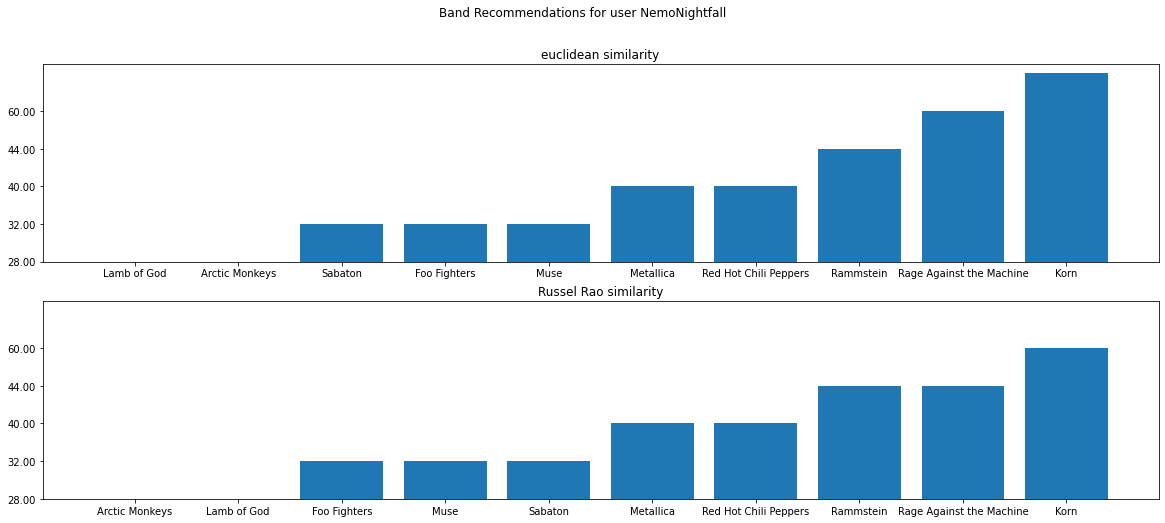

In [37]:
songList_1 = sorted(songList1[:10])
songList_2 = sorted(songList2[:10])

x_val = [format(song[0]*100, '.2f') for song in songList_1]
y_val = [song[1] for song in songList_1]
x_val1 = [format(song[0]*100, '.2f') for song in songList_2]
y_val1 = [song[1] for song in songList_2]

fig, axs = plt.subplots(2, 1, figsize=(20, 8), sharey=True)
axs[0].bar(y_val, x_val)
axs[1].bar(y_val1, x_val1)

axs[0].title.set_text('euclidean similarity')
axs[1].title.set_text('Russel Rao similarity')

fig.suptitle('Band Recommendations for user {}'.format(user))

Bei der Untersuchung der ersten zehn Band-Empfehlungen mit dem höchsten Wahrscheinlichkeitswert für deren Ähnlichkeit zu von anderen Personen favorisierten Bands, konnte unter der Hinzunahme der _euklidischen Distanz_ , als auch der _Russel Rao_ Metrik ein sehr ähnliches Ergebnis erzielt werden. In beiden Ergebnisslisten finden sich die Bands _Korn_ (euclid/56%, russel_rao/59.9%), _Rage Against the Machine_  (euclid/44%, russel_rao/43.9%), als auch _Rammstein_  (euclid/34%, russel_rao/43.9%) unter den ersten drei Empfehlungen. Abnehmend von hier unterschiedet sich das Ergebnis leicht im berechneten Wert, inhaltlich sind die ersten zehn Bands jedoch namentlich in beiden Listen vertreten. 

Wahrscheinlich ist aufgrund der Empfehlungswerte, dass der beispielhaft gewählte Nutzer "NemoNightfall" eine stärkere Tendenz zu alternativen Musikrichtungen, wie Metal, als auch Rock hat. 

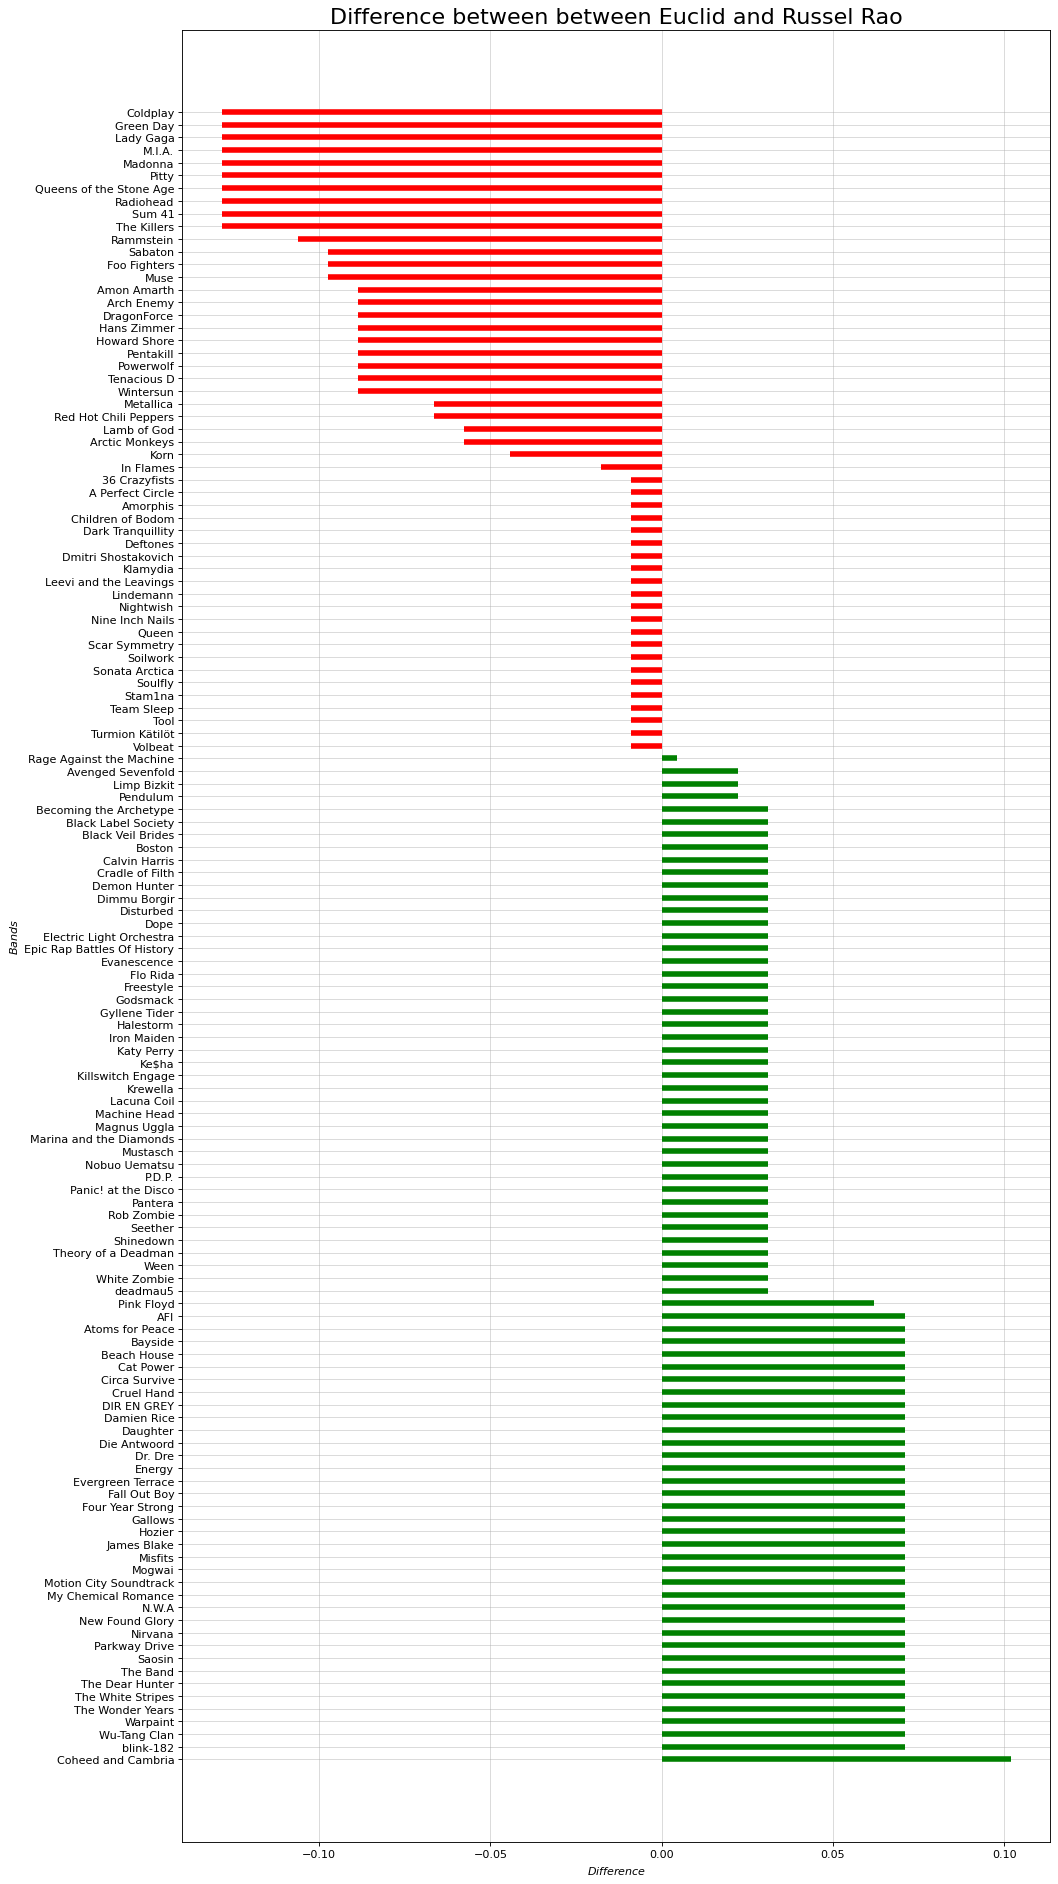

In [38]:
difList = []
for band1 in songList1:
    for band2 in songList2:
        if band1[1] == band2[1]:
            scoreDif = band1[0] - band2[0]
            difList.append((scoreDif, band1[1]))
difList.sort(reverse = True)

difDf = pd.DataFrame(difList)
difDf['colors'] = ['red' if x < 0 else 'green' for x in difDf[0]]
difDf

plt.figure(figsize = (14, 30), dpi = 80)
plt.hlines(y=difDf[1], xmin=0, xmax=difDf[0], color=difDf.colors, linewidth=5)
plt.yticks(fontsize=10)
plt.gca().set(ylabel="$Bands$", xlabel="$Difference$")
plt.title("Difference between between Euclid and Russel Rao", fontdict={'size':20})
plt.grid(linestyle="-",alpha=0.5)
plt.show()

In diesem Plot wird für jede Band die Abweichung der euklidischen und Russel Rao Ähnlichkeit dargestellt. Man erkennt, dass die maximale Abweichung bei 0.15 liegt. Die Differenz ändert sich stufenweise, da beide Ähnlichkeitsmaße auf Brüchen basieren.
Die ersten fünf Empfehlungen von der euklidischen Ähnlichkeit sowie der RusselRao sind sehr ähnlich. Der Grund für den leichten Unterschied ist, dass der Wert bei der euklidischen Ähnlichkeit auch bei übereinstimmenden Nullen steigt. Bei der Russel Rao Ähnlichkeit ist dies nur bei übereinstimmenden Einsen der Fall.

#### Zusatzaufgabe Untersuchung der Lst.fm 360k Datensätze

Die Datensätze _Last.fm dataset 360k_ umfassen etwa 360.000 individuelle Last.fm-Künstler-Hörinformationen der einzelnen Benutzer. Diese wurden von der _Last.fm API_ mittels der _user_get_top_artist()_ Methode des API Endpunktes für 360.000 Nutzer abgerufen und können online unter http://ocelma.net/MusicRecommendationDataset/index.html abgerufen werden. 

Die in diesem Versuch verwendeten Datensätze sind in Tupel _<user, artist-mbid, artist-name, total-plays>_ strukturiert. Diese geben an, wie oft ein Last.fm-Benutzer Lieder von verschiedenen Künstlern gespielt hat. Die Profildaten enthalten zudem das Wohnsitzland jedes Benutzers. 

**Files**
 - usersha1-artmbid-artname-plays.tsv (MD5: be672526eb7c69495c27ad27803148f1)
 - usersha1-profile.tsv               (MD5: 51159d4edf6a92cb96f87768aa2be678)
 - mbox_sha1sum.py                    (MD5: feb3485eace85f3ba62e324839e6ab39)

**Daten Statistik:**
- Total Lines:           17,559,530
- Unique Users:             359,347
- Artists with MBID:        186,642
- Artists without MBID:     107,373

**Referenz**
- Last.fm https://www.last.fm/home

Hinweis: Die Datensätze für dieses Experiment wurden von Òscar Celma @ MTG/UPF, im Herbst 2008 gesammelt und im Laufe des Jahres 2009 bereinigt.


In [ ]:
from scipy.sparse import csr_matrix

In [4]:
# display results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Wenn die Datensätze in den Arbeitsspeicher geladen sind, kann mit der Datenverarbeitung begonnen werden.
Für das Einlesen der Datensätze aus den zuvor herunter geladenen '.tsv' Dateien wird die pandas library verwendet. Die beiden Datenfiles werden in einen _user_data Pandas Datenframe_ und einen _user_profiles Pandas Datenframe_ geladen. 
- usersha1-artmbid-artname-plays.tsv
- usersha1-profile.tsv

In [8]:
df_user = pd.read_table('../data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv',
                          header = None, nrows = 2e7,
                          names = ['users', 'musicbrainz-artist-id', 'artist-name', 'plays'],
                          usecols = ['users', 'artist-name', 'plays'])
df_profiles = pd.read_table('../data/lastfm-dataset-360K/usersha1-profile.tsv',
                          header = None,
                          names = ['users', 'gender', 'age', 'country', 'signup'],
                          usecols = ['users', 'country'])

In [9]:
# Check the datasets
df_user.head()

,users,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137.000
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099.000
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897.000
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717.000
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706.000


In [10]:
df_profiles.head()

,users,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,Germany
1,00001411dc427966b17297bf4d69e7e193135d89,Canada
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,Germany
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,Mexico
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,United States


#### Filtern von populären Künstlern:
Die Idee ist ein Item-Based Collaborative Filtering als Recommender System auf die Last.fm 360k Datensätze anzuwenden. Das heißt die Empfehlungen basieren auf dem Nutzerverhalten und hier vorzufindenden Muster. Hierbei ist zu beachten, dass weniger bekannte Künstler die Ergebnisse negativ beeinflussen können, da diese weniger 'views' haben und damit auch als _Noise_ identifiziert werden können. Aus diesem Grund sollen im Folgenden nur populäre Künstler aus den Dataframes heraus gefiltert werden. Das heißt nur Künstler die den höchsten _total play count_ im Datensatz vorzuweisen haben.  

In [11]:
if df_user['artist-name'].isnull().sum() > 0:
    df_user= df_user.dropna(axis = 0, subset = ['artist-name'])

In [12]:
artist_plays = (df_user.groupby(by = ['artist-name'])['plays'].sum().reset_index().rename(columns = {'plays': 'total_artist_plays'})[['artist-name', 'total_artist_plays']])
artist_plays.head()

,artist-name,total_artist_plays
0,2,56.000
1,58725ab=>,23.000
2,cours de la somme,9.000
3,fatboy slim,16.000
4,oliver shanti & friends,3.000


In den Datensätzen sind Fehleinträge und nicht bereinigte Daten vorhanden. Diese können heraus gefiltert werden. Im nächsten Schritt können die Dataframes anhand der Spalte _total play_ in die _user activity_ Datenframes zusammengeführt (_df.merge()_) werden. 

In [13]:
user_artist = df_user.merge(artist_plays, left_on = 'artist-name', right_on = 'artist-name', how = 'left')
user_artist.head()

,users,artist-name,plays,total_artist_plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137.000,19436.000
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099.000,1863748.000
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897.000,84333.000
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717.000,219244.000
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706.000,45807.000


Um herauszufinden, wo die Anzahl für die total Grenze im Datensatz der _total artist plays_ der Künstler liegt können statistische Funktionen auf dem Dataframe ausgeführt werden.  Im Durchschnitt werden Künstler jedoch ca. ~ 8823 Mal abgespielt. Diese Information ist jedoch durch die große Anzahl an Künstlern mit nur wenigen _total artist plays_ stark beeinflusst. Es kann daher abgelesen werden, dass der _Median (hier: 50%)_ der Künstler bei nur 211 _total artist plays_ liegt.

In [14]:
print(artist_plays['total_artist_plays'].describe())

count     214531.000
mean        8823.943
std       108720.134
min            1.000
25%           54.000
50%          211.000
75%          995.000
max     15295695.000
Name: total_artist_plays, dtype: float64


In [48]:
print(artist_plays['total_artist_plays'].quantile(np.arange(.9, 1, .01))) 

0.900     6137.800
0.910     7409.420
0.920     9102.040
0.930    11474.660
0.940    14898.000
0.950    19964.500
0.960    28420.120
0.970    43541.420
0.980    79403.560
0.990   198483.660
Name: total_artist_plays, dtype: float64


An den statistischen Daten kann abgelesen werden, dass nur 1% der Künstler eine total artist plays Anzahl von über 190.000 erreicht, während 2% der Künstler bereits nur noch eine Anzahl von um 79.403 erreichen. Um nur die populärsten Künstler herauszufiltern findet im Folgenden eine Beschränkung mittels einem popularity threshold von 40.000 auf die obersten 3% aller Künstler statt.

In [15]:
popularity_threshold = 40000
# Filter for popularity by threshold
popular_artists = user_artist.query('total_artist_plays >= @popularity_threshold')
popular_artists.head()

,users,artist-name,plays,total_artist_plays
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099.000,1863748.000
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897.000,84333.000
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717.000,219244.000
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706.000,45807.000
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691.000,6771642.000


Beispielsweise: Filtern auf country == Germany für die populärsten Künster in Deutschland.

In [17]:
df_combined = popular_artists.merge(df_profiles, left_on = 'users', right_on = 'users', how = 'left')
ger_data = df_combined.query('country == \'Germany\'')
ger_data.head()

,users,artist-name,plays,total_artist_plays,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099.000,1863748.000,Germany
1,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897.000,84333.000,Germany
2,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717.000,219244.000,Germany
3,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706.000,45807.000,Germany
4,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691.000,6771642.000,Germany


Filtern auf country == France für die populärsten Künster in Frankreich.

In [18]:
fr_data = df_combined.query('country == \'France\'')
fr_data.head()

,users,artist-name,plays,total_artist_plays,country
4722,0014e7ddfa8d8e75eae3615c28d34a5b66fe9bc4,jason mraz,68.000,1370676.000,France
4723,0014e7ddfa8d8e75eae3615c28d34a5b66fe9bc4,john mayer,47.000,1739239.000,France
4724,0014e7ddfa8d8e75eae3615c28d34a5b66fe9bc4,amy macdonald,38.000,436209.000,France
4725,0014e7ddfa8d8e75eae3615c28d34a5b66fe9bc4,katy perry,38.000,774233.000,France
4726,0014e7ddfa8d8e75eae3615c28d34a5b66fe9bc4,akon,27.000,621293.000,France


Für eine weitere Datenanalyse müssen alle Datensätze konsistent sein. Duplikate müssen daher heraus gefiltert werden.

In [19]:
# Filter duplicated data in 'user' and 'artist-name'
print('Ursprüngliches Dataframe {0}'.format(ger_data.shape))

if not ger_data[ger_data.duplicated(['users', 'artist-name'])].empty:
    initial_rows = ger_data.shape[0]
    ger_data = ger_data.drop_duplicates(['users', 'artist-name'])
    current_rows = ger_data.shape[0]
    print('Neues Datafra,e {0}'.format(ger_data.shape))
    print('Entfernte Reihen {0} '.format(initial_rows - current_rows))

Initial dataframe shape (581685, 5)
New dataframe shape (581682, 5)
Removed 3 rows


#### Anwendung des K-Nearest Neighbor Models

Für die Anwendung des K-Nearest Neighbor Algorithmus sollten alle Datensätze im Format _m x n_ sein. Das heißt _m_ ist die Anzahl der Künstler, während _n_ die Anzahl der Nutzer ist. Um das _Pandas Dataframe_ zu verändern kann hier die _pivot()_ Funktion angewandt werden. Nicht vorhandene Daten können mit dem 0 wert ausgefüllt werden (_sparse matrix_). Dies hat hier keine größere Beeinflussung, da lineare Berechnungen statt finden, um die Distanz der beiden Vektoren zu berechnen. Die Berechnung der Ähnlichkeit zwischen der Künstler Vektoren wird mittels _Cosine_ berechnet.

In [21]:
from sklearn.neighbors import NearestNeighbors

In [48]:
artist_data = ger_data.pivot(index = 'artist-name', columns = 'users', values = 'plays').fillna(0)

Konvertierung des Pandas Dataframes zu einer _scipy sparse matrix_.

In [49]:
# convert dataframe of movie features to scipy sparse matrix
artist_data_sparse_matrix = csr_matrix(artist_data.values)
artist_data_sparse_matrix

<6296x15740 sparse matrix of type '<class 'numpy.float64'>'
	with 581682 stored elements in Compressed Sparse Row format>

Aufgrund der Problematik des "curse of dimensionality" wird anstelle der euklidschen Distanz die Kosinusähnlichkeit als Metrik genommen.

In [50]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(artist_data_sparse_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

#### Empfehlungen auf Basis des k-NN Models
_Tutorial von Nick Becker, Nividia_

In [51]:
!pip install fuzzywuzzy
# Fuzzy string matching. 
# It uses Levenshtein Distance to calculate the differences between sequences in a simple-to-use package.
import string
from fuzzywuzzy import fuzz

In [52]:
# @author: Tutorial by Nick Becker, NIVIDIA 
def print_artist_recommendations(query_artist, artist_plays_matrix, knn_model, k):
    query_index = None
    ratio_tuples = []
    
    for i in artist_plays_matrix.index:
        ratio = fuzz.ratio(i.lower(), query_artist.lower())
        if ratio >= 75:
            current_query_index = artist_plays_matrix.index.tolist().index(i)
            ratio_tuples.append((i, ratio, current_query_index))
    
    print('Possible matches: {0}\n'.format([(x[0], x[1]) for x in ratio_tuples]))
    
    try:
        query_index = max(ratio_tuples, key = lambda x: x[1])[2] # get the index of the best artist match in the data
    except:
        print('Your artist didn\'t match any artists in the data. Try again')
        return None
    
    distances, indices = knn_model.kneighbors(artist_plays_matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors = k + 1)

    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(artist_plays_matrix.index[query_index]))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, artist_plays_matrix.index[indices.flatten()[i]], distances.flatten()[i])) 

    return None

In [53]:
print_artist_recommendations('red hot chili peppers', artist_data, model_knn, k = 10)

Possible matches: [('red hot chili peppers', 100)]

Recommendations for red hot chili peppers:

1: queens of the stone age, with distance of 0.6818477090202437:
2: john frusciante, with distance of 0.7099858563379238:
3: foo fighters, with distance of 0.7364080529030733:
4: rage against the machine, with distance of 0.7801260256013212:
5: franz ferdinand, with distance of 0.7914699161066545:
6: nirvana, with distance of 0.7966072734813947:
7: system of a down, with distance of 0.7981886040528324:
8: scouting for girls, with distance of 0.798927418670723:
9: jack johnson, with distance of 0.8004601517146973:
10: billy talent, with distance of 0.817721293163754:


In [54]:
print_artist_recommendations('foo fighters', artist_data, model_knn, k = 10)

Possible matches: [('foo fighters', 100)]

Recommendations for foo fighters:

1: queens of the stone age, with distance of 0.6258212858888631:
2: red hot chili peppers, with distance of 0.7364080529030733:
3: audioslave, with distance of 0.7470089149111672:
4: beatsteaks, with distance of 0.7605475963194824:
5: staind, with distance of 0.7688770286008286:
6: bush, with distance of 0.7986507504129097:
7: the subways, with distance of 0.7993987576972846:
8: the killers, with distance of 0.8126079449667216:
9: pearl jam, with distance of 0.8155488130321261:
10: snow patrol, with distance of 0.8211103299170851:
